In [1]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]])
# 0 - Brain tumor
# 1 - not Brain tumor

OneHotEncoder()

In [3]:
data = []
paths = []
result = []

for r, d, f in os.walk(r"C:\Users\rohit\Downloads\data set new\archive (9)\yes"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [4]:
paths = []
for r, d, f in os.walk(r"C:\Users\rohit\Downloads\data set new\archive (9)\no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [5]:
data = np.array(data)
data.shape

(2891, 128, 128, 3)

In [6]:
result = np.array(result)
result = result.reshape(2891,2)
result.shape

(2891, 2)

In [7]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [8]:
model = Sequential()


model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [9]:
x_train.shape

(2312, 128, 128, 3)

In [10]:
y_train.shape

(2312, 2)

In [11]:
x_test.shape

(579, 128, 128, 3)

In [12]:
y_test.shape

(579, 2)

In [34]:
history= model.fit(x_train, y_train, epochs =30, batch_size = 50, verbose = 1,validation_data=(x_test,y_test))

Epoch 1/30
47/47 [==============================] - 64s 1s/step - loss: 0.0146 - val_loss: 0.0244
Epoch 2/30
47/47 [==============================] - 59s 1s/step - loss: 0.0154 - val_loss: 0.0249
Epoch 3/30
47/47 [==============================] - 79s 2s/step - loss: 0.0116 - val_loss: 0.0271
Epoch 4/30
47/47 [==============================] - 76s 2s/step - loss: 0.0115 - val_loss: 0.0294
Epoch 5/30
47/47 [==============================] - 85s 2s/step - loss: 0.0135 - val_loss: 0.0162
Epoch 6/30
47/47 [==============================] - 82s 2s/step - loss: 0.0194 - val_loss: 0.0318
Epoch 7/30
47/47 [==============================] - 83s 2s/step - loss: 0.0183 - val_loss: 0.0317
Epoch 8/30
47/47 [==============================] - 66s 1s/step - loss: 0.0110 - val_loss: 0.0186
Epoch 9/30
47/47 [==============================] - 62s 1s/step - loss: 0.0148 - val_loss: 0.0123
Epoch 10/30
47/47 [==============================] - 63s 1s/step - loss: 0.0094 - val_loss: 0.0107
Epoch 11/30
47/47 [

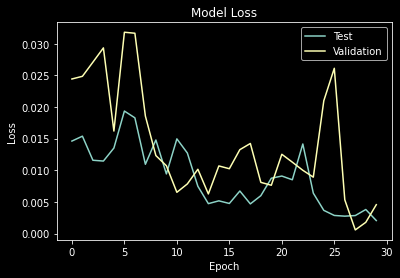

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [36]:
def names(number):
    if number==0:
        return 'Its a brain tumor '
    else:
        return 'Its  not a brain tumor'

99.9912977218628Its a brain tumor 


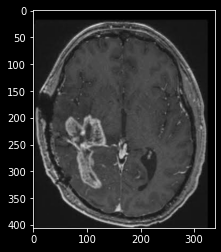

In [40]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\rohit\Downloads\data set new\archive (9)\pred\pred13.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
result= model.predict_on_batch(x)
classification = np.where(result == np.amax(result))[1][0]
imshow(img)
print(str(result[0][classification]*100) +  names(classification))

In [41]:
result.shape

(1, 2)

In [42]:
import tensorflow as tf
from tensorflow import keras

In [43]:
filename1 = 'Finalmodel05.h5'
filepath1 = os.path.join('C:', 'Users', 'rohit', filename1)

In [44]:
model.save(filepath1)

In [45]:
loaded_model = tf.keras.models.load_model(filepath1)

100.0Its a brain tumor 


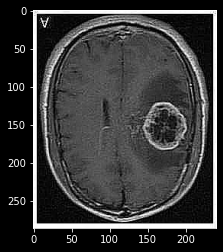

In [46]:


def names(number):
    if number==0:
        return 'Its a brain tumor '
    else:
        return 'Its  not a brain tumor'
img = Image.open(r"C:\Users\rohit\Downloads\Brain Tumor Detection App\UPLOAD_FOLDER\y976.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) +  names(classification))


99.91142153739929Its a brain tumor 


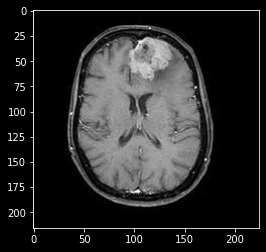

In [47]:
def names(number):
    if number==0:
        return 'Its a brain tumor '
    else:
        return 'Its  not a brain tumor'
img = Image.open(r"C:\Users\rohit\OneDrive\Desktop\DATASET\Yes\image(99).jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) +  names(classification))

99.91142153739929Its a brain tumor 


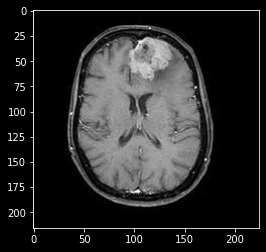

In [53]:

def names(number):
    if number==0:
        return 'Its a brain tumor '
    else:
        return 'Its  not a brain tumor'
img = Image.open(r"C:\Users\rohit\OneDrive\Desktop\DATASET\Yes\image(99).jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) +  names(classification))